The following code 1. calculates the number of overlaps between RNA-seq genes and annotated genes from CUT&RUN using pandas 2. plot them as venn diagrams using matplotlib_venn.
INPUT: RNA-seq data, annotated peaks tsv files outputted from 14_ChIPseeker.Rmd
OUTPUT: printed output of number genes in RNA-seq data and in annotated peaks and number of overlaps between the two; saved png files for venn diagrams (see example output png)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
RNA_dir = '/path/to/RNA_seq/files/'
CnR_dir = '/path/to/annotated_peaks/'
out_dir = '/path/to/output/'

In [3]:
# Read RNA seq data
clampDE_yw_RNA = pd.read_csv(RNA_dir + 'clampDeltaEM_ywM_allresults.csv')
clampDH_yw_RNA = pd.read_csv(RNA_dir + 'clampDeltaHM_ywM_allresults.csv')

# Read DiffBind peaks
CLAMP_deltaDE_vs_yw_A_down = pd.read_csv(CnR_dir + 'CLAMP_deltaDE-deltaDE_vs_yw_males_autosomes_down.tsv', sep='\t')
CLAMP_deltaDE_vs_yw_X_down = pd.read_csv(CnR_dir + 'CLAMP_deltaDE-deltaDE_vs_yw_males_chrX_down.tsv', sep='\t')
CLAMP_deltaH_vs_yw_A_down = pd.read_csv(CnR_dir + 'CLAMP_deltaH-deltaH_vs_yw_males_autosome_down.tsv', sep='\t')
CLAMP_deltaH_vs_yw_X_down = pd.read_csv(CnR_dir + 'CLAMP_deltaH-deltaH_vs_yw_males_chrX_down.tsv', sep='\t')

MSL2_clampDE_vs_yw_A_up = pd.read_csv(CnR_dir + 'MSL2_clampDE-clampDE_vs_yw_males_autosomes_up.tsv', sep='\t')
MSL2_clampDE_vs_yw_X_up = pd.read_csv(CnR_dir + 'MSL2_clampDE-clampDE_vs_yw_males_chrX_up.tsv', sep='\t')
MSL2_clampDH_vs_yw_A_down = pd.read_csv(CnR_dir + 'MSL2_clampDH-clampDH_vs_yw_males_autosomes_down.tsv', sep='\t')
MSL2_clampDH_vs_yw_A_up = pd.read_csv(CnR_dir + 'MSL2_clampDH-clampDH_vs_yw_males_autosomes_up.tsv', sep='\t')
MSL2_clampDH_vs_yw_X_up = pd.read_csv(CnR_dir + 'MSL2_clampDH-clampDH_vs_yw_males_chrX_up.tsv', sep='\t')

In [ ]:
# Get significant genes from RNA seq
clampDE_yw_RNA_down = clampDE_yw_RNA.loc[(clampDE_yw_RNA['pvalue'] < 0.05) & (clampDE_yw_RNA['log2FoldChange'] < 0)]
clampDE_yw_RNA_up = clampDE_yw_RNA.loc[(clampDE_yw_RNA['pvalue'] < 0.05) & (clampDE_yw_RNA['log2FoldChange'] > 0)]

clampDH_yw_RNA_down = clampDH_yw_RNA.loc[(clampDH_yw_RNA['pvalue'] < 0.05) & (clampDH_yw_RNA['log2FoldChange'] < 0)]
clampDH_yw_RNA_up = clampDH_yw_RNA.loc[(clampDH_yw_RNA['pvalue'] < 0.05) & (clampDH_yw_RNA['log2FoldChange'] > 0)]

In [5]:
# clampDeltaEM_ywM RNA-seq vs. CLAMP_deltaDE-deltaDE_vs_yw_males_autosomes_down CnR
df = CLAMP_deltaDE_vs_yw_A_down.merge(clampDE_yw_RNA, how='inner', left_on='geneId', right_on='row')
CLAMP_deltaDE_vs_yw_A_CnR_down_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
CLAMP_deltaDE_vs_yw_A_CnR_down_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDE_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDE_yw_RNA_up),
    '\n total in CnR: ', len(CLAMP_deltaDE_vs_yw_A_down),
    '\n down reulated in CnR and down regulated in RNA:', len(CLAMP_deltaDE_vs_yw_A_CnR_down_RNA_down),
    '\n down regulated in CnR and up regulated in RNA:', len(CLAMP_deltaDE_vs_yw_A_CnR_down_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2636 
 up regulated in RNA:  2600 
 total in CnR:  2 
 down reulated in CnR and down regulated in RNA: 1 
 down regulated in CnR and up regulated in RNA: 0


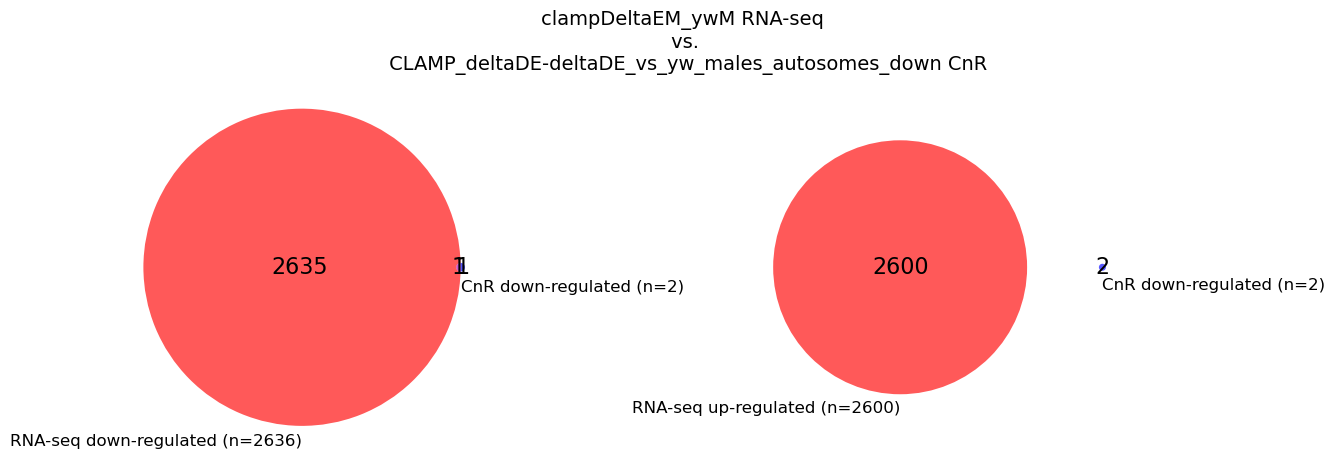

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaEM_ywM RNA-seq \n vs. \n CLAMP_deltaDE-deltaDE_vs_yw_males_autosomes_down CnR',  fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDE_yw_RNA_down['row']), set(CLAMP_deltaDE_vs_yw_A_down['geneId'])), 
            set_labels = ('RNA-seq down-regulated (n=%i)' %len(set(clampDE_yw_RNA_down['row'])), 
            'CnR down-regulated (n=%i)' %len(set(CLAMP_deltaDE_vs_yw_A_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDE_yw_RNA_up['row']), set(CLAMP_deltaDE_vs_yw_A_down['geneId'])), 
            set_labels = ('RNA-seq up-regulated (n=%i)' %len(set(clampDE_yw_RNA_up['row'])), 
            'CnR down-regulated (n=%i)' %len(set(CLAMP_deltaDE_vs_yw_A_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   if text is not None:
      text.set_fontsize(16)
for text in venn_2.subset_labels:
   if text is not None:
      text.set_fontsize(16)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig(out_dir + 'CLAMP_deltaDE_vs_yw_A_CnR_down.png', bbox_inches='tight', dpi=400)
plt.show()

In [7]:
# clampDeltaEM_ywM RNA-seq vs. CLAMP_deltaDE-deltaDE_vs_yw_males_chrX_down CnR
df = CLAMP_deltaDE_vs_yw_X_down.merge(clampDE_yw_RNA, how='inner', left_on='geneId', right_on='row')
CLAMP_deltaDE_vs_yw_X_CnR_down_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
CLAMP_deltaDE_vs_yw_X_CnR_down_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDE_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDE_yw_RNA_up),
    '\n total in CnR: ', len(CLAMP_deltaDE_vs_yw_X_down),
    '\n down reulated in CnR and down regulated in RNA:', len(CLAMP_deltaDE_vs_yw_X_CnR_down_RNA_down),
    '\n down regulated in CnR and up regulated in RNA:', len(CLAMP_deltaDE_vs_yw_X_CnR_down_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2636 
 up regulated in RNA:  2600 
 total in CnR:  6 
 down reulated in CnR and down regulated in RNA: 1 
 down regulated in CnR and up regulated in RNA: 1


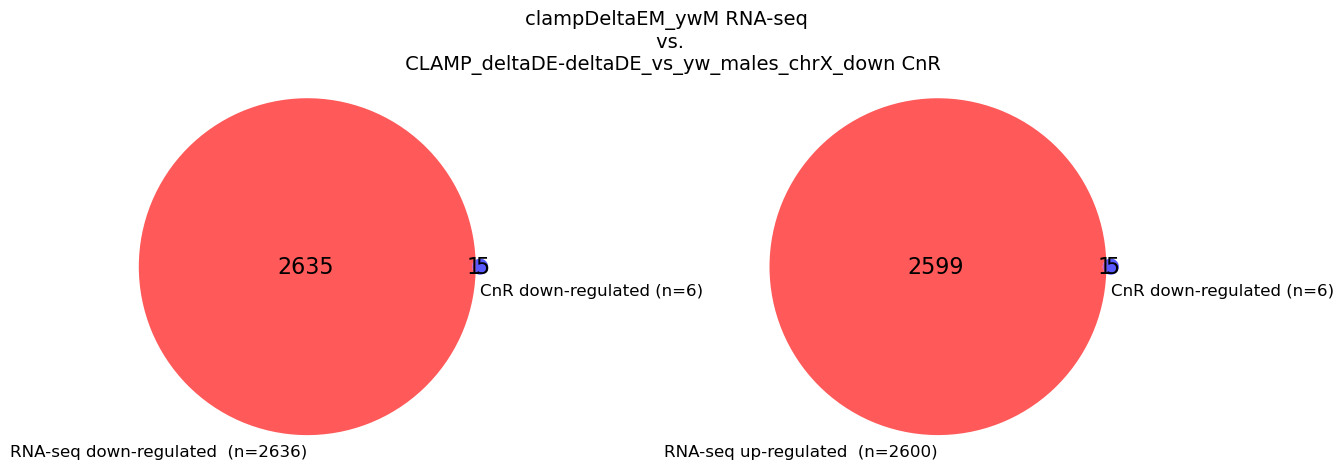

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaEM_ywM RNA-seq \n vs. \n CLAMP_deltaDE-deltaDE_vs_yw_males_chrX_down CnR', fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDE_yw_RNA_down['row']), set(CLAMP_deltaDE_vs_yw_X_down['geneId'])), 
            set_labels = ('RNA-seq down-regulated  (n=%i)' %len(set(clampDE_yw_RNA_down['row'])), 
            'CnR down-regulated (n=%i)' %len(set(CLAMP_deltaDE_vs_yw_X_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDE_yw_RNA_up['row']), set(CLAMP_deltaDE_vs_yw_X_down['geneId'])), 
            set_labels = ('RNA-seq up-regulated  (n=%i)' %len(set(clampDE_yw_RNA_up['row'])), 
            'CnR down-regulated (n=%i)' %len(set(CLAMP_deltaDE_vs_yw_X_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   text.set_fontsize(16)
for text in venn_2.subset_labels:
   text.set_fontsize(16)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig(out_dir + 'CLAMP_deltaDE_vs_yw_X_CnR_down.png', bbox_inches='tight', dpi=400)
plt.show()

In [9]:
# clampDeltaEM_ywM RNA-seq vs. MSL2_clampDE-clampDE_vs_yw_males_autosomes_up CnR
df = MSL2_clampDE_vs_yw_A_up.merge(clampDE_yw_RNA, how='inner', left_on='geneId', right_on='row')
MSL2_clampDE_vs_yw_A_CnR_up_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
MSL2_clampDE_vs_yw_A_CnR_up_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDE_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDE_yw_RNA_up),
    '\n total in CnR: ', len(MSL2_clampDE_vs_yw_A_up),
    '\n up reulated in CnR and down regulated in RNA:', len(MSL2_clampDE_vs_yw_A_CnR_up_RNA_down),
    '\n up regulated in CnR and up regulated in RNA:', len(MSL2_clampDE_vs_yw_A_CnR_up_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2636 
 up regulated in RNA:  2600 
 total in CnR:  390 
 up reulated in CnR and down regulated in RNA: 71 
 up regulated in CnR and up regulated in RNA: 66


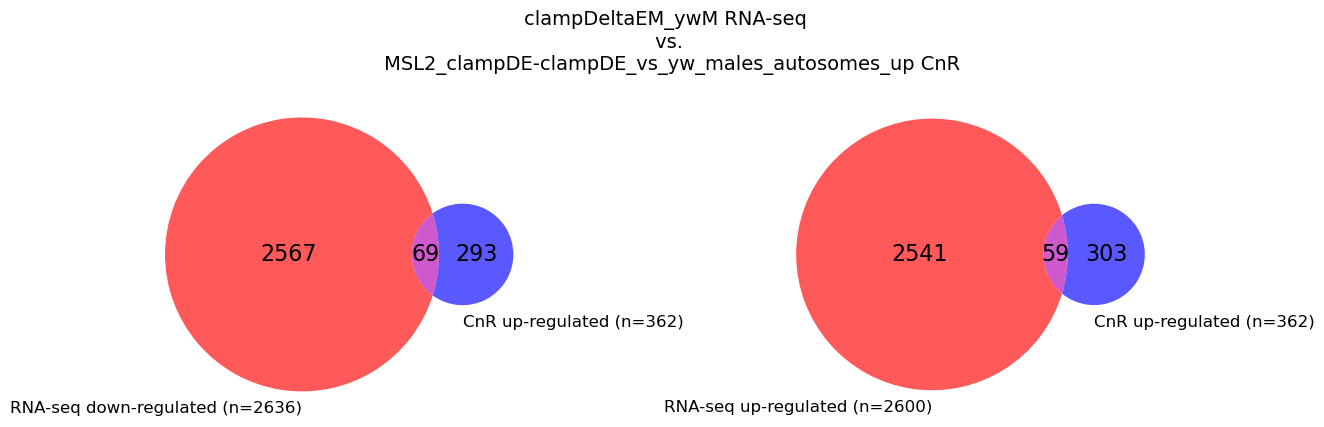

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaEM_ywM RNA-seq \n vs. \n MSL2_clampDE-clampDE_vs_yw_males_autosomes_up CnR', fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDE_yw_RNA_down['row']), set(MSL2_clampDE_vs_yw_A_up['geneId'])), 
            set_labels = ('RNA-seq down-regulated (n=%i)' %len(set(clampDE_yw_RNA_down['row'])), 
            'CnR up-regulated (n=%i)' %len(set(MSL2_clampDE_vs_yw_A_up['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDE_yw_RNA_up['row']), set(MSL2_clampDE_vs_yw_A_up['geneId'])), 
            set_labels = ('RNA-seq up-regulated (n=%i)' %len(set(clampDE_yw_RNA_up['row'])), 
            'CnR up-regulated (n=%i)' %len(set(MSL2_clampDE_vs_yw_A_up['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   text.set_fontsize(16)
for text in venn_2.subset_labels:
   text.set_fontsize(16)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig(out_dir + 'MSL2_clampDE_vs_yw_A_CnR_up.png', bbox_inches='tight', dpi=400)
plt.show()

In [11]:
# clampDeltaEM_ywM RNA-seq vs. MSL2_clampDE-clampDE_vs_yw_males_chrX_up CnR
df = MSL2_clampDE_vs_yw_X_up.merge(clampDE_yw_RNA, how='inner', left_on='geneId', right_on='row')
MSL2_clampDE_vs_yw_X_CnR_up_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
MSL2_clampDE_vs_yw_X_CnR_up_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDE_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDE_yw_RNA_up),
    '\n total in CnR: ', len(MSL2_clampDE_vs_yw_X_up),
    '\n up reulated in CnR and down regulated in RNA:', len(MSL2_clampDE_vs_yw_X_CnR_up_RNA_down),
    '\n up regulated in CnR and up regulated in RNA:', len(MSL2_clampDE_vs_yw_X_CnR_up_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2636 
 up regulated in RNA:  2600 
 total in CnR:  346 
 up reulated in CnR and down regulated in RNA: 76 
 up regulated in CnR and up regulated in RNA: 49


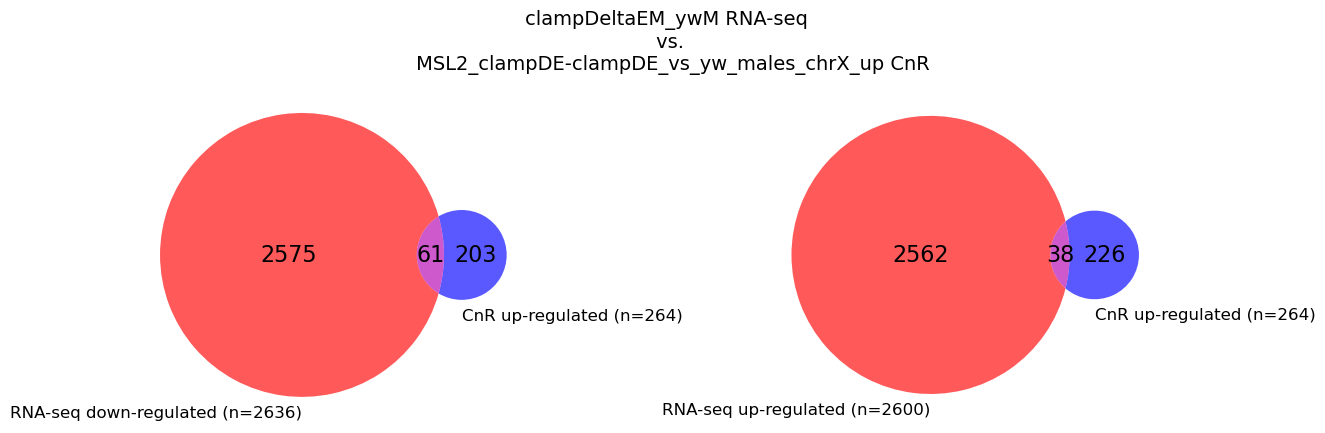

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaEM_ywM RNA-seq \n vs. \n MSL2_clampDE-clampDE_vs_yw_males_chrX_up CnR', fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDE_yw_RNA_down['row']), set(MSL2_clampDE_vs_yw_X_up['geneId'])), 
            set_labels = ('RNA-seq down-regulated (n=%i)' %len(set(clampDE_yw_RNA_down['row'])), 
            'CnR up-regulated (n=%i)' %len(set(MSL2_clampDE_vs_yw_X_up['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDE_yw_RNA_up['row']), set(MSL2_clampDE_vs_yw_X_up['geneId'])), 
            set_labels = ('RNA-seq up-regulated (n=%i)' %len(set(clampDE_yw_RNA_up['row'])), 
            'CnR up-regulated (n=%i)' %len(set(MSL2_clampDE_vs_yw_X_up['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   text.set_fontsize(16)
for text in venn_2.subset_labels:
   text.set_fontsize(16)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig(out_dir + 'MSL2_clampDE_vs_yw_X_CnR_up.png', bbox_inches='tight', dpi=400)
plt.show()

In [13]:
# clampDeltaHM_ywM RNA-seq vs. CLAMP_deltaH-deltaH_vs_yw_males_autosome_down CnR
df = CLAMP_deltaH_vs_yw_A_down.merge(clampDH_yw_RNA, how='inner', left_on='geneId', right_on='row')
CLAMP_deltaDH_vs_yw_A_CnR_down_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
CLAMP_deltaDH_vs_yw_A_CnR_down_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDH_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDH_yw_RNA_up),
    '\n total in CnR: ', len(CLAMP_deltaH_vs_yw_A_down),
    '\n down reulated in CnR and down regulated in RNA:', len(CLAMP_deltaDH_vs_yw_A_CnR_down_RNA_down),
    '\n down regulated in CnR and up regulated in RNA:', len(CLAMP_deltaDH_vs_yw_A_CnR_down_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2760 
 up regulated in RNA:  3134 
 total in CnR:  2 
 down reulated in CnR and down regulated in RNA: 1 
 down regulated in CnR and up regulated in RNA: 0


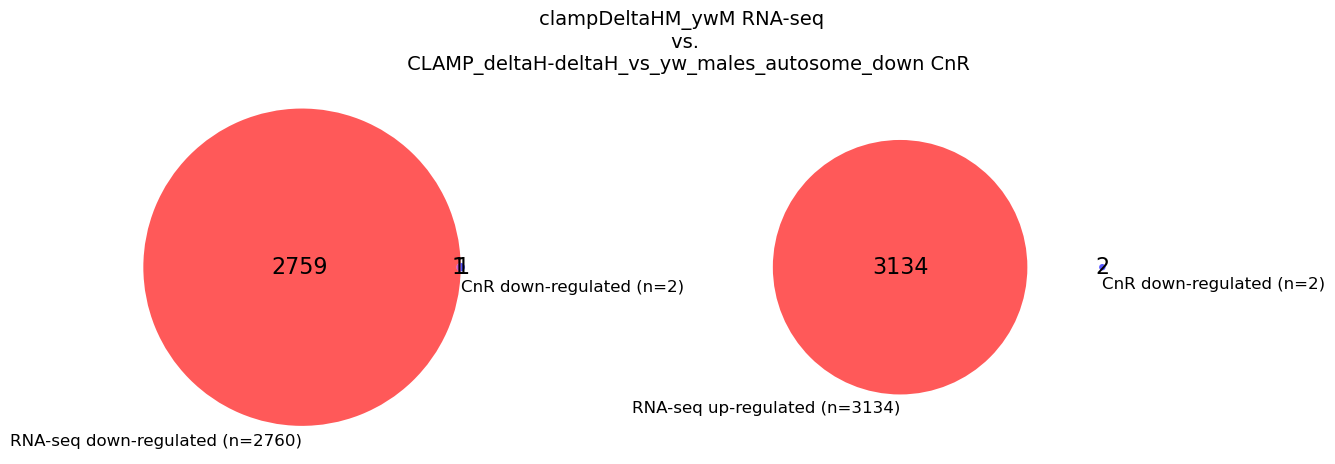

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaHM_ywM RNA-seq \n vs. \n CLAMP_deltaH-deltaH_vs_yw_males_autosome_down CnR', fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDH_yw_RNA_down['row']), set(CLAMP_deltaH_vs_yw_A_down['geneId'])), 
            set_labels = ('RNA-seq down-regulated (n=%i)' %len(set(clampDH_yw_RNA_down['row'])), 
             'CnR down-regulated (n=%i)' %len(set(CLAMP_deltaH_vs_yw_A_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDH_yw_RNA_up['row']), set(CLAMP_deltaH_vs_yw_A_down['geneId'])), 
            set_labels = ('RNA-seq up-regulated (n=%i)' %len(set(clampDH_yw_RNA_up['row'])), 
             'CnR down-regulated (n=%i)' %len(set(CLAMP_deltaH_vs_yw_A_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   if text is not None:
      text.set_fontsize(16)
for text in venn_2.subset_labels:
   if text is not None:
      text.set_fontsize(16)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig(out_dir + 'CLAMP_deltaDH_vs_yw_A_CnR_down.png', bbox_inches='tight', dpi=400)
plt.show()

In [15]:
# clampDeltaHM_ywM_allresults RNA-seq vs. CLAMP_deltaH-deltaH_vs_yw_males_chrX_down CnR
df = CLAMP_deltaH_vs_yw_X_down.merge(clampDH_yw_RNA, how='inner', left_on='geneId', right_on='row')
CLAMP_deltaDH_vs_yw_X_CnR_down_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
CLAMP_deltaDH_vs_yw_X_CnR_down_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDH_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDH_yw_RNA_up),
    '\n total in CnR: ', len(CLAMP_deltaH_vs_yw_X_down),
    '\n down reulated in CnR and down regulated in RNA:', len(CLAMP_deltaDH_vs_yw_X_CnR_down_RNA_down),
    '\n down regulated in CnR and up regulated in RNA:', len(CLAMP_deltaDH_vs_yw_X_CnR_down_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2760 
 up regulated in RNA:  3134 
 total in CnR:  3 
 down reulated in CnR and down regulated in RNA: 1 
 down regulated in CnR and up regulated in RNA: 1


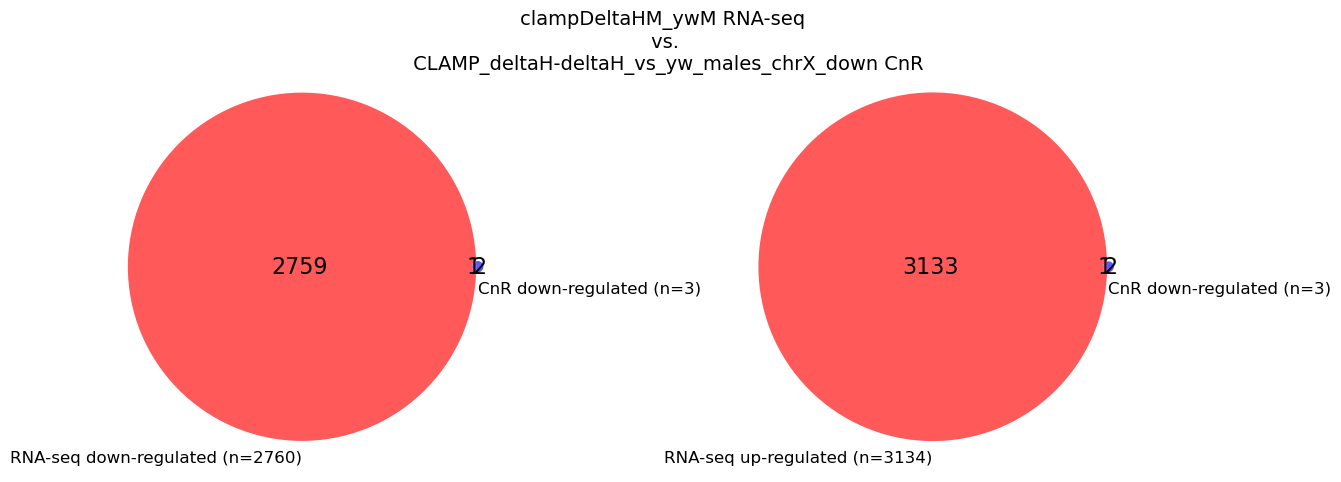

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaHM_ywM RNA-seq \n vs. \n CLAMP_deltaH-deltaH_vs_yw_males_chrX_down CnR', fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDH_yw_RNA_down['row']), set(CLAMP_deltaH_vs_yw_X_down['geneId'])), 
            set_labels = ('RNA-seq down-regulated (n=%i)' %len(set(clampDH_yw_RNA_down['row'])), 
            'CnR down-regulated (n=%i)' %len(set(CLAMP_deltaH_vs_yw_X_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDH_yw_RNA_up['row']), set(CLAMP_deltaH_vs_yw_X_down['geneId'])), 
            set_labels = ('RNA-seq up-regulated (n=%i)' %len(set(clampDH_yw_RNA_up['row'])), 
            'CnR down-regulated (n=%i)' %len(set(CLAMP_deltaH_vs_yw_X_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   text.set_fontsize(16)
for text in venn_2.subset_labels:
   text.set_fontsize(16)
   
fig.tight_layout()
fig.subplots_adjust(top=0.9)
plt.savefig(out_dir + 'CLAMP_deltaDH_vs_yw_X_CnR_down.png', bbox_inches='tight', dpi=400)
plt.show()

In [17]:
# clampDeltaHM_ywM_allresults RNA-seq vs. MSL2_clampDH-clampDH_vs_yw_males_autosomes_down CnR
df = MSL2_clampDH_vs_yw_A_down.merge(clampDH_yw_RNA, how='inner', left_on='geneId', right_on='row')
MSL2_clampDH_vs_yw_A_CnR_down_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
MSL2_clampDH_vs_yw_A_CnR_down_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDH_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDH_yw_RNA_up),
    '\n total in CnR: ', len(MSL2_clampDH_vs_yw_A_down),
    '\n down reulated in CnR and down regulated in RNA:', len(MSL2_clampDH_vs_yw_A_CnR_down_RNA_down),
    '\n down regulated in CnR and up regulated in RNA:', len(MSL2_clampDH_vs_yw_A_CnR_down_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2760 
 up regulated in RNA:  3134 
 total in CnR:  2 
 down reulated in CnR and down regulated in RNA: 0 
 down regulated in CnR and up regulated in RNA: 1


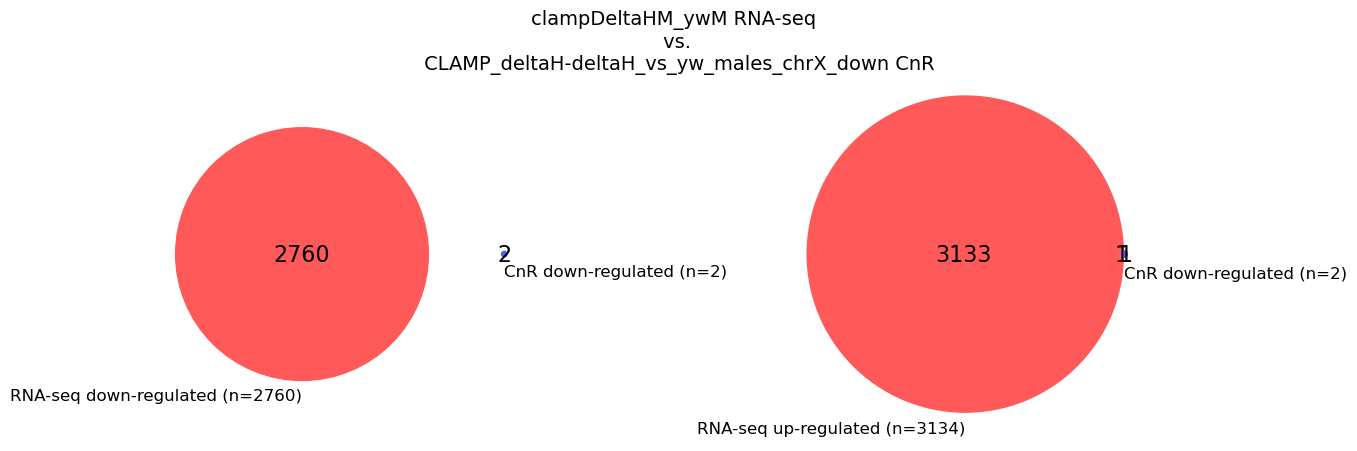

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaHM_ywM RNA-seq \n vs. \n CLAMP_deltaH-deltaH_vs_yw_males_chrX_down CnR', fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDH_yw_RNA_down['row']), set(MSL2_clampDH_vs_yw_A_down['geneId'])), 
            set_labels = ('RNA-seq down-regulated (n=%i)' %len(set(clampDH_yw_RNA_down['row'])), 
            'CnR down-regulated (n=%i)' %len(set(MSL2_clampDH_vs_yw_A_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDH_yw_RNA_up['row']), set(MSL2_clampDH_vs_yw_A_down['geneId'])), 
            set_labels = ('RNA-seq up-regulated (n=%i)' %len(set(clampDH_yw_RNA_up['row'])), 
            'CnR down-regulated (n=%i)' %len(set(MSL2_clampDH_vs_yw_A_down['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   if text is not None: 
      text.set_fontsize(16)
for text in venn_2.subset_labels:
   if text is not None:
      text.set_fontsize(16)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig(out_dir + 'MSL2_clampDH_vs_yw_A_CnR_down.png', bbox_inches='tight', dpi=400)
plt.show()

In [19]:
# clampDeltaHM_ywM_allresults RNA-seq vs. MSL2_clampDH-clampDH_vs_yw_males_autosomes_up CnR
df = MSL2_clampDH_vs_yw_A_up.merge(clampDH_yw_RNA, how='inner', left_on='geneId', right_on='row')
MSL2_clampDH_vs_yw_A_CnR_up_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
MSL2_clampDH_vs_yw_A_CnR_up_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDH_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDH_yw_RNA_up),
    '\n total in CnR: ', len(MSL2_clampDH_vs_yw_A_up),
    '\n up reulated in CnR and down regulated in RNA:', len(MSL2_clampDH_vs_yw_A_CnR_up_RNA_down),
    '\n up regulated in CnR and up regulated in RNA:', len(MSL2_clampDH_vs_yw_A_CnR_up_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2760 
 up regulated in RNA:  3134 
 total in CnR:  582 
 up reulated in CnR and down regulated in RNA: 181 
 up regulated in CnR and up regulated in RNA: 87


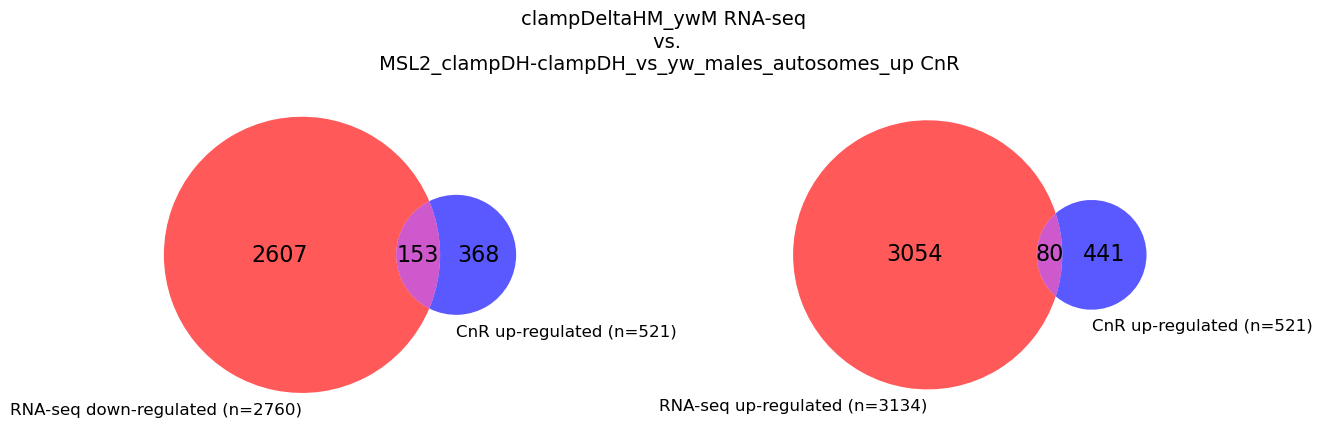

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaHM_ywM RNA-seq \n vs. \n MSL2_clampDH-clampDH_vs_yw_males_autosomes_up CnR', fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDH_yw_RNA_down['row']), set(MSL2_clampDH_vs_yw_A_up['geneId'])), 
            set_labels = ('RNA-seq down-regulated (n=%i)' %len(set(clampDH_yw_RNA_down['row'])), 
            'CnR up-regulated (n=%i)' %len(set(MSL2_clampDH_vs_yw_A_up['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDH_yw_RNA_up['row']), set(MSL2_clampDH_vs_yw_A_up['geneId'])), 
            set_labels = ('RNA-seq up-regulated (n=%i)' %len(set(clampDH_yw_RNA_up['row'])), 
            'CnR up-regulated (n=%i)' %len(set(MSL2_clampDH_vs_yw_A_up['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   if text is not None: 
      text.set_fontsize(16)
for text in venn_2.subset_labels:
   if text is not None:
      text.set_fontsize(16)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig(out_dir 'MSL2_clampDH_vs_yw_A_CnR_up.png', bbox_inches='tight', dpi=400)
plt.show()

In [21]:
# clampDeltaHM_ywM_allresults RNA-seq vs. MSL2_clampDH-clampDH_vs_yw_males_chrX_up CnR
df = MSL2_clampDH_vs_yw_X_up.merge(clampDH_yw_RNA, how='inner', left_on='geneId', right_on='row')
MSL2_clampDH_vs_yw_X_CnR_up_RNA_down = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] < 0)]
MSL2_clampDH_vs_yw_X_CnR_up_RNA_up = df.loc[(df['pvalue'] < 0.05) & (df['log2FoldChange'] > 0)]

print('CLAMP_deltaDE_vs_yw_A',
    '\n down regulated in RNA: ', len(clampDH_yw_RNA_down),
    '\n up regulated in RNA: ', len(clampDH_yw_RNA_up),
    '\n total in CnR: ', len(MSL2_clampDH_vs_yw_X_up),
    '\n up reulated in CnR and down regulated in RNA:', len(MSL2_clampDH_vs_yw_X_CnR_up_RNA_down),
    '\n up regulated in CnR and up regulated in RNA:', len(MSL2_clampDH_vs_yw_X_CnR_up_RNA_up))

CLAMP_deltaDE_vs_yw_A 
 down regulated in RNA:  2760 
 up regulated in RNA:  3134 
 total in CnR:  508 
 up reulated in CnR and down regulated in RNA: 155 
 up regulated in CnR and up regulated in RNA: 81


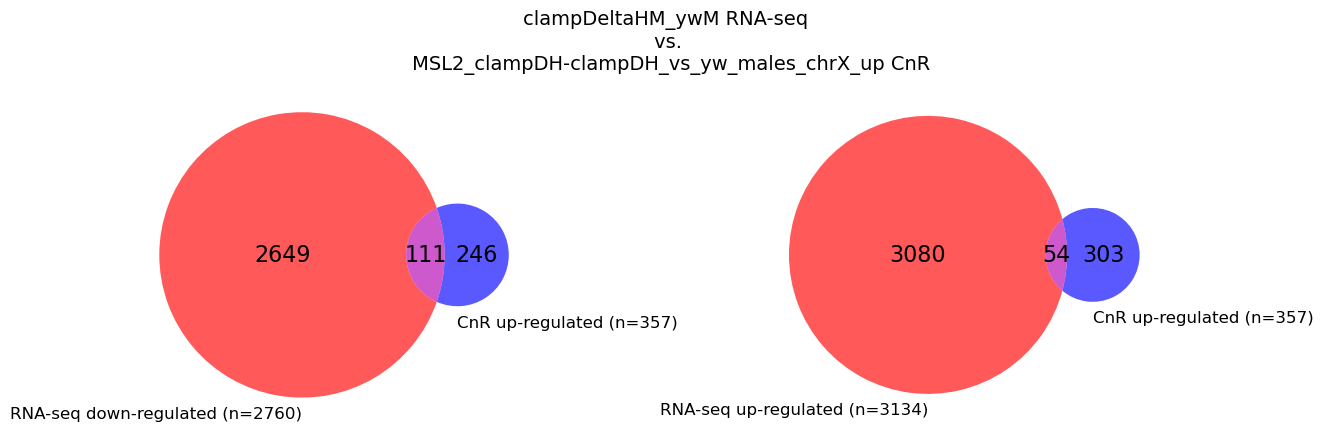

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13,5))
fig.suptitle('clampDeltaHM_ywM RNA-seq \n vs. \n MSL2_clampDH-clampDH_vs_yw_males_chrX_up CnR', fontsize=14)
venn_1 = venn2(
            subsets = (set(clampDH_yw_RNA_down['row']), set(MSL2_clampDH_vs_yw_X_up['geneId'])), 
            set_labels = ('RNA-seq down-regulated (n=%i)' %len(set(clampDH_yw_RNA_down['row'])), 
            'CnR up-regulated (n=%i)' %len(set(MSL2_clampDH_vs_yw_X_up['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax1       
            )

venn_2 = venn2(
            subsets = (set(clampDH_yw_RNA_up['row']), set(MSL2_clampDH_vs_yw_X_up['geneId'])), 
            set_labels = ('RNA-seq up-regulated (n=%i)' %len(set(clampDH_yw_RNA_up['row'])), 
            'CnR up-regulated (n=%i)' %len(set(MSL2_clampDH_vs_yw_X_up['geneId']))),
            set_colors=('red','blue'),
            alpha=0.65,
            ax=ax2
            )
for text in venn_1.subset_labels:
   if text is not None: 
      text.set_fontsize(16)
for text in venn_2.subset_labels:
   if text is not None:
      text.set_fontsize(16)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.savefig(out_dir + 'MSL2_clampDH_vs_yw_X_CnR_up.png', bbox_inches='tight', dpi=400)
plt.show()